In [1]:
import sys
sys.path.append('../../')

In [20]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.test import EURUSD 
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import *
from util.SMA import *
from util.plot_return import *


In [3]:
XAUUSD = {}
XAUUSD['D1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['D1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H4'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H4'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M30'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M30'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M15'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M15'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M5'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M5'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M1'] + '.csv', index_col='Time', parse_dates=True)

In [14]:
XAUUSD['H4']

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01 00:00:00,635.679,636.194,635.009,635.497,95
2007-01-01 04:00:00,635.336,636.220,635.254,635.699,97
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96
...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240


In [23]:
class SMA_crossover(Strategy) :
    ATR_SL = 0.5
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['sma_fast'] = SMA(self.data.df,50,200)['sma_fast']
    def next(self):

        pre_sma_fast = self.data.df.loc[self.data.df.index[-2], 'sma_fast']
        pre_sma_low = self.data.df.loc[self.data.df.index[-2], 'sma_slow']
        current_sma_fast = self.data.df.loc[self.data.df.index[-1], 'sma_fast']
        current_sma_low = self.data.df.loc[self.data.df.index[-1], 'sma_slow']
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']

        if  pre_sma_fast < pre_sma_low and current_sma_fast >= current_sma_low and  not self.position :
            tp = self.data.Close + current_ATR * self.ATR_SL
            sl = self.data.Close - current_ATR * self.ATR_SL
            # Place your buy logic here
            self.buy(sl=sl, tp=tp, size=1)

        if pre_sma_fast > pre_sma_low and current_sma_fast <= current_sma_low and not self.position:
            tp = self.data.Close - current_ATR * self.ATR_SL
            sl = self.data.Close + current_ATR * self.ATR_SL
               
            self.sell(sl=sl, tp=tp, size=1)

In [9]:
account_size = 20000

In [24]:
bt = Backtest(XAUUSD['H1'], SMA_crossover, cash=account_size, margin=1/2000, )
result = bt.run()
result

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                    0.955551
Equity Final [$]                 19910.996975
Equity Peak [$]                    20008.2032
Return [%]                          -0.445015
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                   -0.022285
Volatility (Ann.) [%]                0.057826
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.519205
Avg. Drawdown [%]                    -0.11982
Max. Drawdown Duration     3368 days 20:00:00
Avg. Drawdown Duration      826 days 07:00:00
# Trades                                  570
Win Rate [%]                        46.315789
Best Trade [%]                       0.518401
Worst Trade [%]                     -0.493825
Avg. Trade [%]                    

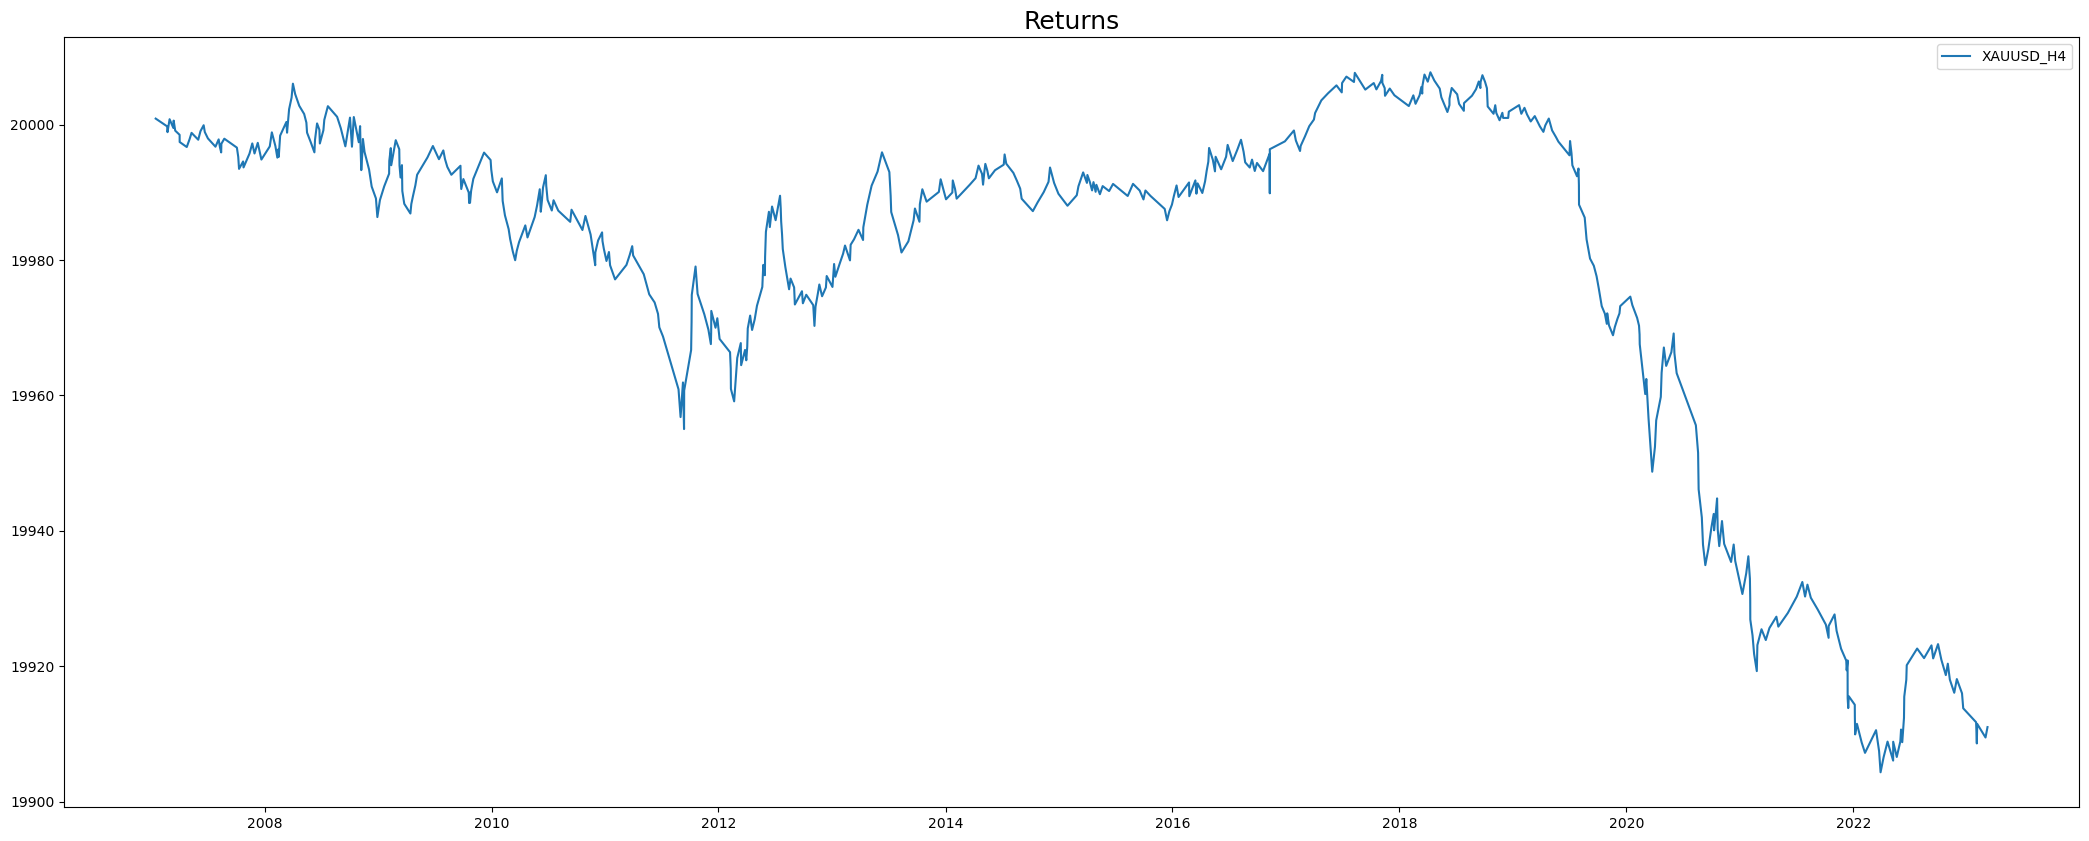

In [25]:
plot_return_trades(result['_trades'],'XAUUSD_H4' , account_size)

In [11]:
bt.plot()

Row(id='1407', ...)